In [1]:
import numpy as np 
import imageio
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from PIL import Image
def pt_pxls(data, title, colors=None, N=10000):    
    if colors is None:
        colors = data    
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=16);

In [2]:
def image_compresser(n):
    image = imageio.imread('C:/Users/shank/Desktop/Data Analytics/Dataset for HW3/Picture.jpg')
    print(image.shape)
    plt.imshow(image)
    plt.show()
    imagech = (image/ 255.0).reshape(-1,3)
    pt_pxls(imagech, title='Color space for million colors')
    kmeans = MiniBatchKMeans(n)
    kmeans.fit(imagech)
    new_colors = kmeans.cluster_centers_[kmeans.predict(imagech)]

    pt_pxls(imagech, colors=new_colors,
            title="Reduced color space for k colors")
    image_recolored = new_colors.reshape(image.shape)

    fig, ax = plt.subplots(1, 2, figsize=(10, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(image)
    ax[0].set_title('Original Image', size=8)
    ax[1].imshow(image_recolored)
    ax[1].set_title('compressed-color Image', size=8);

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
def random_algorithm(x_train,y_train):
    train_x, test_x, train_y, test_y = train_test_split(x_train, y_train, test_size=0.25, random_state=0)
    RF_model = RandomForestClassifier(n_estimators=10,max_depth=6)
    RF_model.fit(train_x, train_y)
    test_x = np.array(test_x)
    RF_predictions = RF_model.predict(test_x)
    score = accuracy_score(test_y ,RF_predictions)
    print("Accuracy:",score)
    probs = RF_model.predict_proba(test_x)[:,1]
    auc_scr=roc_auc_score(test_y, probs)
    print("AUROC :", auc_scr)

In [4]:
batch_size = 128
num_classes = 10
epochs = 20
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import numpy as np
import pandas as pd
def neural_deeplearning(n,actit,optim):
    train_data= np.load('C:/Users/shank/Desktop/Data Analytics/Dataset for HW3/train.data')
    test_data = np.load('C:/Users/shank/Desktop/Data Analytics/Dataset for HW3/test.data')
    train_data.files
    x_train = train_data["X_train"]
    y_train = train_data["y_train"]
    x_test = test_data['X_test']
    y_test = test_data['y_test']
    x_train = x_train.reshape(2000, 112)
    x_test = x_test.reshape(1000, 112)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)
    model = Sequential()
    model.add(Dense(512, activation=actit, input_shape=(112,)))
    for i in range(n-1):
        model.add(Dense(512, activation=actit))
        model.add(Dropout(0.2))
        model.add(Dense(num_classes, activation=actit))
    model.summary()
    model.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['accuracy'])
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs)
    accuracy = model.evaluate(x_train, y_train, verbose=0)
    accuracy
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

Using TensorFlow backend.


In [5]:
def main():
    
    image_compresser(8)
    image_compresser(16)
    data=np.load('C:/Users/shank/Desktop/Data Analytics/Dataset for HW3/train.data')
    x_train=data['X_train']
    y_train=data['y_train']
    random_algorithm(x_train,y_train)
    data=np.load('C:/Users/shank/Desktop/Data Analytics/Dataset for HW3/test.data')
    x_train=data['X_test']
    y_train=data['y_test']
    random_algorithm(x_train,y_train)
    data=np.load('C:/Users/shank/Desktop/Data Analytics/Dataset for HW3/valid.data')
    x_train=data['X_valid']
    y_train=data['y_valid']
    random_algorithm(x_train,y_train)
    neural_deeplearning(5,'relu','adam')
    neural_deeplearning(10,'sigmoid','RMSprop')
    neural_deeplearning(10,'relu','RMSprop')
    neural_deeplearning(5,'sigmoid','adam')


(533, 799, 3)


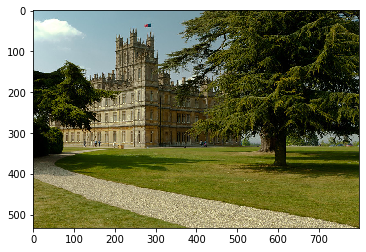

(533, 799, 3)


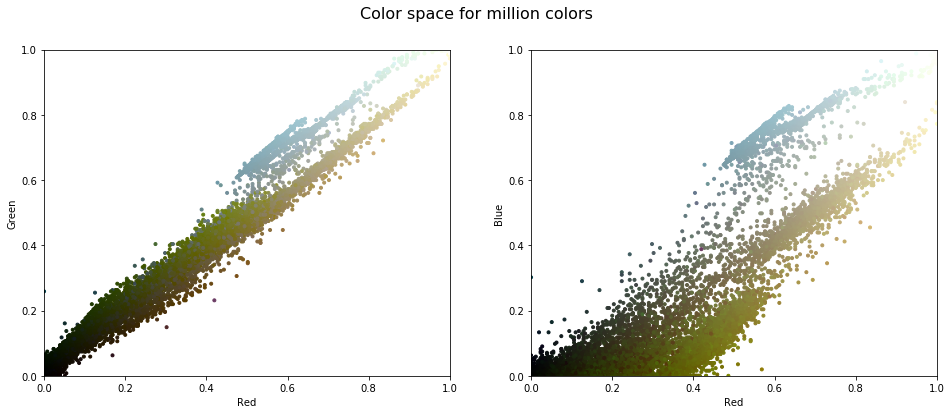

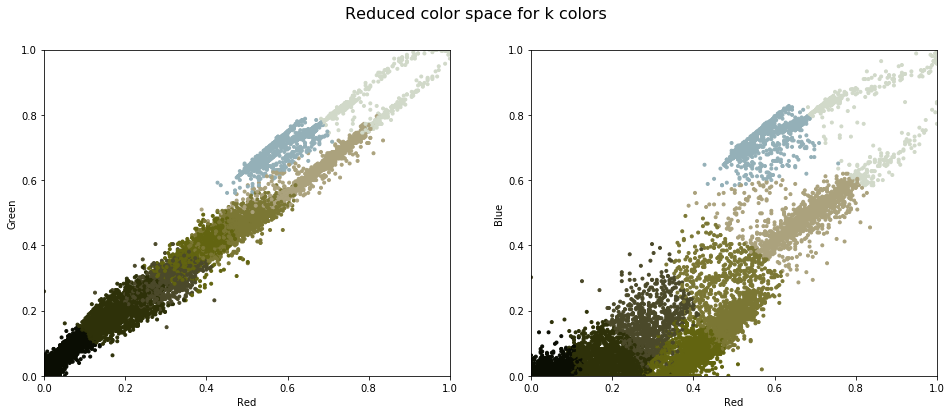

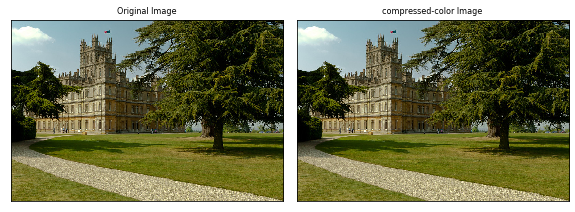

Accuracy: 0.87
AUROC : 0.7598152424942263
Accuracy: 0.876
AUROC : 0.7087878787878787
Accuracy: 0.872
AUROC : 0.7730763859796118
2000 train samples
1000 test samples
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               57856     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
_________________________________________________________________
dense_4 (Dense)              (None, 512)               5632      
_________________________________________________________________
dropout_2 (Dropout)  

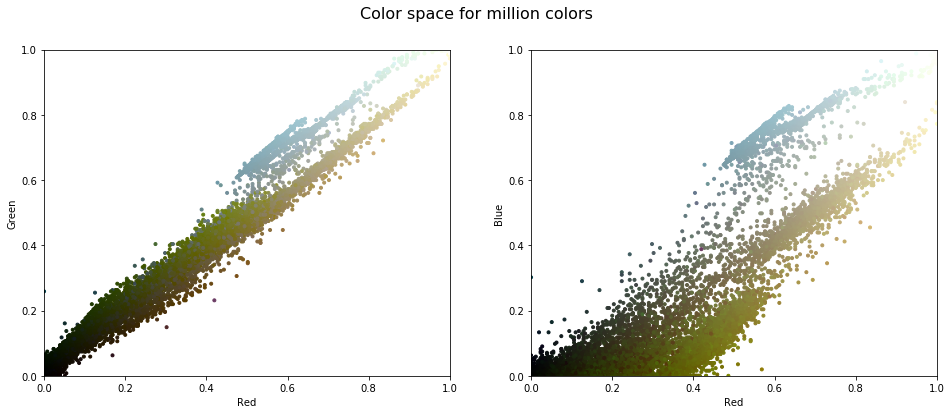

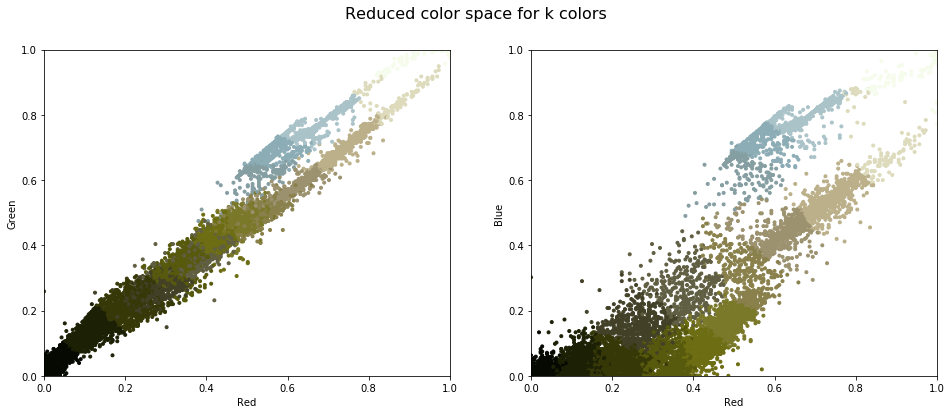

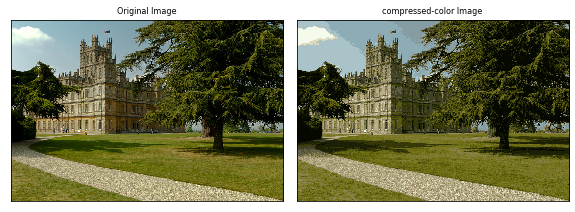

In [6]:
main()